<a href="https://colab.research.google.com/github/gerryau/Building-Autoencoders-in-Keras/blob/main/Building_Autoencoders_in_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Follow along from article: https://blog.keras.io/building-autoencoders-in-keras.html

In this tutorial, we will answer some common questions about autoencoders, and we will cover code examples of the following models:

* a simple autoencoder based on a fully-connected layer
* a sparse autoencoder
* a deep fully-connected autoencoder
* a deep convolutional autoencoder
* an image denoising model
* a sequence-to-sequence autoencoder
* a variational autoencoder

In [6]:
import keras
from keras import layers

# Need 3 things:
# 1. Encoding function, 2. Decoding function, and 3. Loss function

# This is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# This is our input image
input_img = keras.Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = layers.Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = layers.Dense(784, activation='sigmoid')(encoded)

# This model maps an input to its reconstruction
autoencoder = keras.Model(input_img, decoded)


In [7]:
# This model maps an input to its encoded representation
encoder = keras.Model(input_img, encoded)

In [8]:
# This is our encoded (32-dimensional) input
encoded_input = keras.Input(shape=(encoding_dim,))
# Retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# Create the decoder model
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))

In [9]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [10]:
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [11]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [12]:
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/50
235/235 [==============================] - 3s 12ms/step - loss: 0.2782 - val_loss: 0.1910
Epoch 2/50
235/235 [==============================] - 3s 12ms/step - loss: 0.1720 - val_loss: 0.1531
Epoch 3/50
235/235 [==============================] - 3s 11ms/step - loss: 0.1442 - val_loss: 0.1341
Epoch 4/50
235/235 [==============================] - 3s 11ms/step - loss: 0.1292 - val_loss: 0.1219
Epoch 5/50
235/235 [==============================] - 3s 11ms/step - loss: 0.1190 - val_loss: 0.1134
Epoch 6/50
235/235 [==============================] - 3s 12ms/step - loss: 0.1115 - val_loss: 0.1072
Epoch 7/50
235/235 [==============================] - 3s 12ms/step - loss: 0.1062 - val_loss: 0.1026
Epoch 8/50
235/235 [==============================] - 4s 19ms/step - loss: 0.1023 - val_loss: 0.0994
Epoch 9/50
235/235 [==============================] - 3s 12ms/step - loss: 0.0995 - val_loss: 0.0971
Epoch 10/50
235/235 [==============================] - 3s 12ms/step - loss: 0.0975 - val_lo

In [13]:
# Encode and decode some digits
# Note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

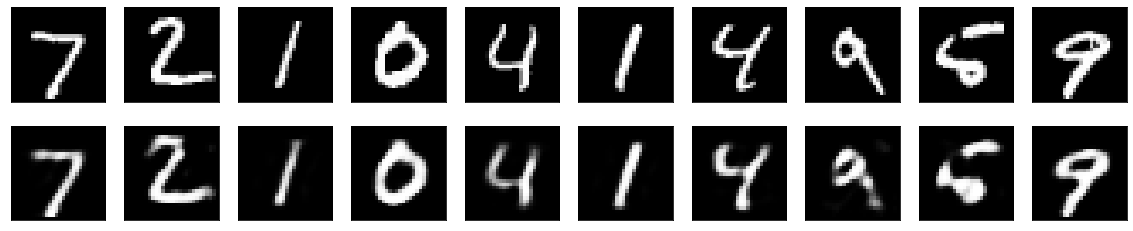

In [14]:
# Use Matplotlib (don't ask)
import matplotlib.pyplot as plt

n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()